In [49]:
import pandas as pd
import numpy as np

In [50]:
df = pd.read_csv('international-airline-passengers.csv',usecols=[1])
df.describe()

,International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60
count,144.000000
mean,280.298611
std,119.966317
min,104.000000
25%,180.000000
50%,265.500000
75%,360.500000
max,622.000000


In [51]:
df.values

array([[112],
       [118],
       [132],
       [129],
       [121],
       [135],
       [148],
       [148],
       [136],
       [119],
       [104],
       [118],
       [115],
       [126],
       [141],
       [135],
       [125],
       [149],
       [170],
       [170],
       [158],
       [133],
       [114],
       [140],
       [145],
       [150],
       [178],
       [163],
       [172],
       [178],
       [199],
       [199],
       [184],
       [162],
       [146],
       [166],
       [171],
       [180],
       [193],
       [181],
       [183],
       [218],
       [230],
       [242],
       [209],
       [191],
       [172],
       [194],
       [196],
       [196],
       [236],
       [235],
       [229],
       [243],
       [264],
       [272],
       [237],
       [211],
       [180],
       [201],
       [204],
       [188],
       [235],
       [227],
       [234],
       [264],
       [302],
       [293],
       [259],
       [229],
       [203],
      

In [52]:
values = df.values.astype('float32')
values.shape

(144, 1)

In [53]:
train_size = int((values.shape[0] * 0.67))
test_size = values.shape[0]  - train_size
train = values[0:train_size]
test = values[train_size:]

In [54]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range =(0,1))
train = scaler.fit_transform(train)
test = scaler.transform(test)

In [55]:
def create_dataset(data, k):
    dataX, dataY = [],[]
    for i in range(data.shape[0] - k):
        x = data[i:i + k, 0]
        y = data[i + k, 0]
        dataX.append(x)
        dataY.append(y)
    return np.array(dataX), np.array(dataY)

In [65]:
look_back = 12
# trainX, trainY = create_dataset(train, look_back)
# testX, testY = create_dataset(test, look_back)
trainX = [[[12,1],[223,2],[12,22]],[[34,0],[21,2],[42,3]],[[34,0],[21,2],[42,3]],[[34,0],[21,2],[42,3]],[[34,0],[21,2],[42,3]]]
trainX = np.array(trainX)
trainY = np.array([1,2,3,4,5])

print(trainX.shape,trainY.shape)

(5, 3, 2) (5,)


In [57]:
trainX = np.reshape(trainX,(trainX.shape[0],trainX.shape[1],1))
testX = np.reshape(testX,(testX.shape[0],testX.shape[1],1))
testX.shape

(36, 12, 1)

In [58]:
from keras.models import Sequential
from keras.layers import SimpleRNN,Dense

model = Sequential()
model.add(SimpleRNN(4,input_shape =(look_back,1)))
model.add(Dense(1))
model.compile(loss="mean_squared_error",optimizer="adam")
model.fit(trainX,trainY,epochs=20,batch_size=1)

Epoch 1/20
84/84 [==============================] - 1s 2ms/step - loss: 0.2189
Epoch 2/20
84/84 [==============================] - 0s 2ms/step - loss: 0.0345
Epoch 3/20
84/84 [==============================] - 0s 2ms/step - loss: 0.0218
Epoch 4/20
84/84 [==============================] - 0s 2ms/step - loss: 0.0176
Epoch 5/20
84/84 [==============================] - 0s 2ms/step - loss: 0.0155
Epoch 6/20
84/84 [==============================] - 0s 2ms/step - loss: 0.0142
Epoch 7/20
84/84 [==============================] - 0s 2ms/step - loss: 0.0137
Epoch 8/20
84/84 [==============================] - 0s 1ms/step - loss: 0.0126
Epoch 9/20
84/84 [==============================] - 0s 2ms/step - loss: 0.0125
Epoch 10/20
84/84 [==============================] - 0s 2ms/step - loss: 0.0117
Epoch 11/20
84/84 [==============================] - 0s 2ms/step - loss: 0.0113
Epoch 12/20
84/84 [==============================] - 0s 2ms/step - loss: 0.0109
Epoch 13/20
84/84 [==============================

In [59]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_2 (SimpleRNN)    (None, 4)                 24        
                                                                 
 dense_2 (Dense)             (None, 1)                 5         
                                                                 
Total params: 29
Trainable params: 29
Non-trainable params: 0
_________________________________________________________________


In [60]:
model.weights

[<tf.Variable 'simple_rnn_2/simple_rnn_cell_2/kernel:0' shape=(1, 4) dtype=float32, numpy=
 array([[-0.3857216 , -1.1213534 ,  0.62388074,  0.74858624]],
       dtype=float32)>,
 <tf.Variable 'simple_rnn_2/simple_rnn_cell_2/recurrent_kernel:0' shape=(4, 4) dtype=float32, numpy=
 array([[-0.11255349, -0.6886247 ,  0.44254953, -0.28839976],
        [-0.1524551 , -0.42444173, -0.14785656,  0.84996784],
        [-0.7043662 , -0.03915149,  0.40475482, -0.05142416],
        [ 0.6564067 , -0.03702638,  0.6351288 ,  0.20268315]],
       dtype=float32)>,
 <tf.Variable 'simple_rnn_2/simple_rnn_cell_2/bias:0' shape=(4,) dtype=float32, numpy=array([ 0.03090494, -0.02707208,  0.00527191,  0.00180295], dtype=float32)>,
 <tf.Variable 'dense_2/kernel:0' shape=(4, 1) dtype=float32, numpy=
 array([[-0.20542912],
        [ 0.30999926],
        [ 0.82613   ],
        [ 0.55543226]], dtype=float32)>,
 <tf.Variable 'dense_2/bias:0' shape=(1,) dtype=float32, numpy=array([-0.03549882], dtype=float32)>]

In [61]:
testpredict = model.predict(testX)
testpredict = scaler.inverse_transform(testpredict).ravel()

trainpredict = model.predict(trainX)
trainpredict = scaler.inverse_transform(trainpredict).ravel()

trainTrue = scaler.inverse_transform([trainY]).ravel()
testTrue = scaler.inverse_transform([testY]).ravel()

testpredict.shape,testTrue.shape

3/3 [==============================] - 0s 3ms/step


((36,), (36,))

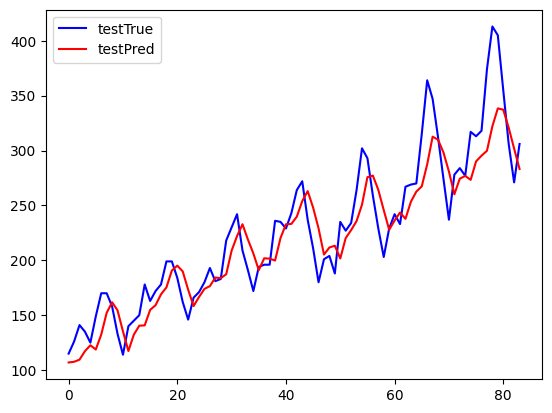

In [62]:
import matplotlib.pyplot as plt

plt.plot(trainTrue, "b",label="testTrue")
plt.plot(trainpredict,"r",label="testPred")
plt.legend()
plt.show()

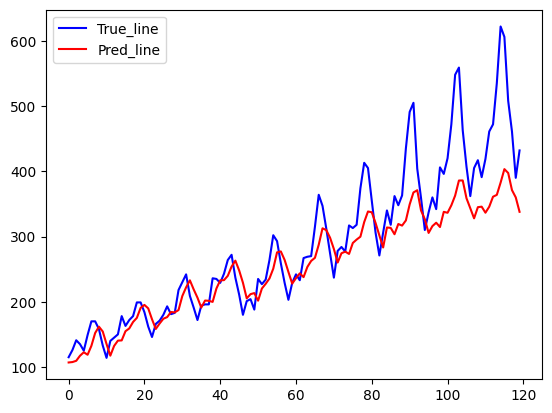

In [63]:
pred_line = np.concatenate((trainpredict,testpredict))
True_line= np.concatenate((trainTrue,testTrue))
plt.plot(True_line, "b",label="True_line")
plt.plot(pred_line,"r",label="Pred_line")
plt.legend()
plt.show()

In [64]:
from sklearn.metrics import r2_score
r2_score(True_line, pred_line)

0.730587957526239